# Data Cleaning Workshop

Up to this point on the course we have been working with nice, clean, structured datasets. This is all very nice, but not very realistic. In the real world, datasets will arrive at your door in a bad shape - full of errors, null values and unreliability. You need to know how to approach these datasets, how to understand their limitations, and how to make repairs where necessary.

This week's workshop will explore how we can use tools in Python to import, clean, analyse and export new datasets. Specifically we'll be working with the **Pandas Data Analysis Library** (http://pandas.pydata.org), introduced briefly to (most of) you during Quantitative Methods last term. During this tutorial, we'll work through an example data cleaning process, finishing with uploading the data directly to your MySQL Database. You'll learn how to approach new datasets, but further expand your skills in using Pandas.

So without further ado, the first thing we need to do is setup our working environment. **Run the scripts below to import the Pandas libraries.**

In [2]:
# import libraries, and set pd as the pandas alias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# run this command too - just to allow more data to be displayed than default
pd.set_option('display.max_rows', 300)



## Data Import

Pandas has a range of functions for enabling the import of data into Python. The import functions are relatively straight forward to use, and require very little in the way actual coding. There are also functions available for a range of different data formats.

In this initial section of the workshop, we will explore how to import CSV data using Pandas. Other data formats (e.g. Excel, JSON, HTML) can be imported will similar ease, the documentation for these tools can be found here: http://pandas.pydata.org/pandas-docs/stable/io.html

An important thing to know about Pandas is that it will always load your data into its own Dataframe format. This format basically acts as a multicolumn table, and so will eventually make loading our cleaned data into MySQL all the more easier. However, before we get to that stage, we need to load the data in, check it for problems and fix it up.

During this part of the workshop we'll be working with air quality data obtained from the *London Air Quality Network* (http://www.londonair.org.uk). Understanding air quality is clearly a very important element of ensuring wellbeing in urban areas. However, the data is highly prone to errors and mistakes, and so requires careful handling and analysis.

We will use a dataset originally obtained from London Air, containing a year's worth of air quality data recorded on Euston Road. You can find this dataset on Moodle, named `'LaqnData_EustonRoad.csv'`.

**Download it and put it somewhere on your computer where you can access it. Add the directory to the command below and run the command.**

In [3]:
# REPLACE THE DIRECTORY BELOW WITH THE LOCATION OF YOUR FILE!

# this command loads your csv data and sets up the 'smog' dataframe, using the Pandas (pd) libraries
smog = pd.read_csv('/Users/VT/Documents/UCL/BUSICS/Spatial Data Capture, Storage and Analysis/Week4/LaqnData_EustonRoad.csv')

We've now imported the data as a dataframe called `'smog'`.

## Initial Data Checks

You can start by checking the import by looking at the data itself - to do this you simply call the dataframe by name. Look at the data, what does it tell you about what we have?

**Note**: This exports a default number of rows (in our case, 500). You can edit this default by running the `pd.set_option('display.max_rows', n)` command, where `n` equals the number of rows to be displayed (assuming pandas has been given the alias `pd`). 

In [4]:
pd.set_option('display.max_rows', 200)
smog

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CD9,NO,01/01/2014 00:00,63.0,ug m-3,R
1,CD9,NO,01/01/2014 00:15,64.3,ug m-3,R
2,CD9,NO,01/01/2014 00:30,57.6,ug m-3,R
3,CD9,NO,01/01/2014 00:45,87.8,ug m-3,R
4,CD9,NO,01/01/2014 01:00,55.3,ug m-3,R
5,CD9,NO,01/01/2014 01:15,92.5,ug m-3,R
6,CD9,NO,01/01/2014 01:30,75.6,ug m-3,R
7,CD9,NO,01/01/2014 01:45,NaN,ug m-3,R
8,CD9,NO,01/01/2014 02:00,NaN,ug m-3,R
9,CD9,NO,01/01/2014 02:15,77.0,ug m-3,R


This gives you a sample of the data, but it may be that you want to look at only the first 100 rows. You can do this by adding the `.head(n)` function to the end of the dataframe name, replacing `n` with the number of rows you wish to see. **Try this out below.**

In [5]:
smog.head(100)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CD9,NO,01/01/2014 00:00,63.0,ug m-3,R
1,CD9,NO,01/01/2014 00:15,64.3,ug m-3,R
2,CD9,NO,01/01/2014 00:30,57.6,ug m-3,R
3,CD9,NO,01/01/2014 00:45,87.8,ug m-3,R
4,CD9,NO,01/01/2014 01:00,55.3,ug m-3,R
5,CD9,NO,01/01/2014 01:15,92.5,ug m-3,R
6,CD9,NO,01/01/2014 01:30,75.6,ug m-3,R
7,CD9,NO,01/01/2014 01:45,NaN,ug m-3,R
8,CD9,NO,01/01/2014 02:00,NaN,ug m-3,R
9,CD9,NO,01/01/2014 02:15,77.0,ug m-3,R


This gives us a sense of what the data looks like, but doesn't provide an idea of how complete it is across the whole dataset. The `.count()` function provides counts of *non-null* values in each column. **Try running this below.**

In [6]:
smog.count()

Site                       175200
Species                    175200
ReadingDateTime            175200
Value                      110233
Units                      175200
Provisional or Ratified    175200
dtype: int64

It would appear that we have a few null values to deal with in the `Value` column. We'll come on to that later.

Before we move on though, it would be worth exploring variation in the data we have imported. From the sample loaded earlier, it would appear we have a number of categorical datasets, and it would be useful to know how many rows correspond to each category. 

To do this, we use the `.value_counts()` function. In calling a function against a column, Pandas allows us to reference the column name directly within the function. This structure requires the dataframe (e.g. `smog`), the column name (e.g. `Site`), and the function name (e.g. `value_counts()`).

In [7]:
smog.Site.value_counts()

CD9    175200
Name: Site, dtype: int64

In [8]:
smog.Species.value_counts()

NOX      35040
PM2.5    35040
NO       35040
NO2      35040
PM10     35040
Name: Species, dtype: int64

In [9]:
smog.ReadingDateTime.value_counts()

06/09/2014 19:30    5
28/11/2014 00:30    5
29/12/2014 04:30    5
11/02/2014 18:15    5
12/08/2014 03:30    5
22/11/2014 14:15    5
28/10/2014 17:45    5
11/06/2014 20:30    5
04/07/2014 13:30    5
02/01/2014 09:45    5
01/09/2014 04:45    5
02/04/2014 11:15    5
10/04/2014 19:45    5
17/10/2014 07:30    5
24/06/2014 01:00    5
25/12/2014 03:00    5
21/11/2014 17:00    5
27/07/2014 07:30    5
25/04/2014 08:15    5
03/07/2014 22:15    5
06/02/2014 19:15    5
26/07/2014 17:45    5
29/03/2014 21:45    5
28/12/2014 21:00    5
21/11/2014 09:00    5
20/03/2014 08:30    5
10/08/2014 13:30    5
29/01/2014 18:00    5
27/04/2014 08:30    5
13/08/2014 19:15    5
07/03/2014 20:30    5
16/02/2014 12:45    5
02/03/2014 15:00    5
21/09/2014 06:30    5
18/05/2014 04:00    5
08/01/2014 17:30    5
08/07/2014 23:15    5
10/06/2014 04:15    5
15/08/2014 22:15    5
23/08/2014 00:00    5
19/11/2014 08:00    5
28/06/2014 07:30    5
19/08/2014 22:45    5
13/08/2014 23:45    5
29/04/2014 22:45    5
02/09/2014

**What do these results tell you about the dataset? **

Next run the same `.value_counts()` function for the `Units` column.

In [10]:
smog.Units.value_counts()

ug m-3           105120
ug m-3 as NO2     35040
ug/m3             35040
Name: Units, dtype: int64

Now run it for the `'Provisional or Ratified'` column. **Hint**: Because of the space in the column name, we can not call it directly, and so must use the `dataframe['column_name'].` format.

In [11]:
smog['Provisional or Ratified'].value_counts()

P    97152
R    78048
Name: Provisional or Ratified, dtype: int64

We might also want to test the coocurrance of different values across different data columns. In order to do this we use the `.groupby()` function instead. This function takes two or more column names, and where calling `.size()` returns the size of each group.

In [12]:
smog.groupby(['Species', 'Units']).size()

Species  Units        
NO       ug m-3           35040
NO2      ug m-3           35040
NOX      ug m-3 as NO2    35040
PM10     ug/m3            35040
PM2.5    ug m-3           35040
dtype: int64

Again, try this for the `'Species'` and `'Provisional or Ratified'` columns. **What do these queries tell you about the data?**

In [13]:
smog.groupby(['Species', 'Provisional or Ratified']).size()

Species  Provisional or Ratified
NO       P                          26496
         R                           8544
NO2      P                          26496
         R                           8544
NOX      P                          26496
         R                           8544
PM10     P                           8832
         R                          26208
PM2.5    P                           8832
         R                          26208
dtype: int64

You should now be building a picture of what the data looks like and the associations between columns. 

The final checks we can do use the `.describe()` function. This provides some basic summary stats relating to variations in the column data. You run it in the same way as you did the `.value_counts()` function, by just calling it against a column name. **Try running this function for each column below.**

In [14]:
smog.Site.describe()
smog.Species.describe()
smog.ReadingDateTime.describe()
smog.Value.describe()
smog.Units.describe()
smog['Provisional or Ratified'].describe()
smog['Units'].describe()

count     175200
unique         3
top       ug m-3
freq      105120
Name: Units, dtype: object

As you will see, different types of results are extracted for each column, some more meaningful than others. `.describe()` actually combines a number of statistical measures, including `.max()`, `.min()` and `.mean()`, the full range can be found here: http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In running through the measures on this dataset, you would be rightfully surprised if you noticed that the `smog.ReadingDateTime.describe()` did not provide very useful data. This is because we have not yet set the correct data types. 

So, before we go on to more detailed organisation of the data, we need to specify how each column should be handled.

## Setting Data Types

As we saw in the last section, the statistics generated for certain columns were not as useful as we expected them to be. This is because we have not yet specified our data types, another important stage in the data cleaning process. 

So, now we've imported our data, we should check the specified data types encoded for each column of the imported dataset. We do this by running the `.dtypes` function on the dataframe.

In [15]:
smog.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

We can see that most of the columns have been imported as `objects`, which is to mean 'string'. This is satisfactory in some cases, based on the sample of the data above, but not all.

Given the issues noted earlier, let's first check out that date field. Most text loaders will not recognise some text as a date by default, so we need to tell it what it is seeing before before we can use the data effectively. 

Fortunately, Pandas has some robust tools for organising date and time data. For this we'll use the `.to_datetime` function and pass it the column in question. The column, now in date format, is written back to the dataframe. We verify this change by running the `.dtypes` function again.

In [16]:
smog['ReadingDateTime'] = pd.to_datetime(smog['ReadingDateTime'])
smog.dtypes

Site                               object
Species                            object
ReadingDateTime            datetime64[ns]
Value                             float64
Units                              object
Provisional or Ratified            object
dtype: object

Now, run the `.describe()` function, and see how the results differ from earlier.

In [17]:
smog.ReadingDateTime.describe()

count                  175200
unique                  35040
top       2014-11-20 03:00:00
freq                        5
first     2014-01-01 00:00:00
last      2014-12-31 23:45:00
Name: ReadingDateTime, dtype: object

We now have a decent idea of the range of dates within the dataset.

The only other change we might want to make is to the `'Provisional or Ratified'` column. A text column for a categorical column containing only one of two values seems a bit superfluous, and would be better served by a conversion to a boolean type. By doing so, a true value can simply reflect whether the reading has been ratified or not.

The first step is to set up a dictionary, linking key to value, and then mapping the new value to the existing column. As you will see, where the column once read `'R'` it now reads `True`, and where it was once `'P'` it is now `False`.

In [18]:
# set up dictionary containing mapping 
d = {'R': True, 'P': False}

# map new vales to existing column values
smog['Provisional or Ratified'] = smog['Provisional or Ratified'].map(d)

Now the `True` or `False` values have been set, we need to convert the type of the column to boolean. This is achieved through the `.astype()` function, which again writes the values back to the dataframe. We send the text 'bool' with the function in order to convert to boolean.

Other values can be used instead of `'bool'` where necessary. A list of alternatives can be found in the user guide here: http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes 

In [19]:
smog['Provisional or Ratified'] = smog['Provisional or Ratified'].astype('bool')
smog.dtypes

Site                               object
Species                            object
ReadingDateTime            datetime64[ns]
Value                             float64
Units                              object
Provisional or Ratified              bool
dtype: object

Now that we've made these changes, the column name doesn't make much sense. We can change that easily again using Pandas. This time we use the `.rename()` function, which will take a dictionary containing the changes we wish to make. We'll simply change the column name to reflect whether the data has been ratified or not.

In [20]:
smog = smog.rename(columns={'Provisional or Ratified': 'Ratified?'})

**Now just check the data again to confirm that the column name changes have been made.**

In [21]:
smog.dtypes

Site                       object
Species                    object
ReadingDateTime    datetime64[ns]
Value                     float64
Units                      object
Ratified?                    bool
dtype: object

**Finally, for simplicity, change the `ReadingDateTime` column name to simply `DateTime`. Then check the contents once more.**

In [22]:
smog = smog.rename(columns={'ReadingDateTime': 'DateTime'})
smog.dtypes

Site                 object
Species              object
DateTime     datetime64[ns]
Value               float64
Units                object
Ratified?              bool
dtype: object

## Detailed Data Checking

Now that we have the data in a useable format, we can start breaking it into useful parts.

Our tests earlier identified five `Species` categories within the data. In view of what we know about the dataset (e.g. it's pollution data) and the other columns, this seems like a good place to start initially breaking down the dataset.

We'll do this by taking a subset of the original dataset and experimenting with it. To create this subset we use the `.loc` function, and provide some specification logic (sort of like SQL). The `.loc` function allows us to specify the rows and columns we wish to keep. For this example, we'll take all data from `smog` where the `Species` equals `'NOX'`. **Run the scripts below.**

**Note**: There are lots of ways to create subsets from Pandas dataframes. You may want to investigate the `.iloc` (for subsetting on column or row position) and `.ix` (mixed integer and label subsets) methods. If you're interested then check out the documentation here: http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

In [23]:
smog_pm10 = smog.loc[smog.Species == 'PM10']

Now we have this dataset, **check its contents** and verify it contains what we expect it to.

In [24]:
smog_pm10.head()

,Site,Species,DateTime,Value,Units,Ratified?
105120,CD9,PM10,2014-01-01 00:00:00,NaN,ug/m3,True
105121,CD9,PM10,2014-01-01 00:15:00,NaN,ug/m3,True
105122,CD9,PM10,2014-01-01 00:30:00,NaN,ug/m3,True
105123,CD9,PM10,2014-01-01 00:45:00,NaN,ug/m3,True
105124,CD9,PM10,2014-01-01 01:00:00,NaN,ug/m3,True


**Run the `.describe()` function too to check the statistics of the subset data.** Notice anything odd?

In [25]:
smog_pm10.describe()

,Value,Ratified?
count,8552.000000,35040
mean,29.266195,0.747945
std,16.044339,0.434199
min,-8.400000,False
25%,17.500000,0
50%,27.200000,1
75%,38.800000,1
max,109.100000,True


Let's also plot the data. Again, very simple using Pandas. We just use the `.plot()` function on the dataframe, and specify the `x` and `y` axes. In the case of this data, we're probably most interested in the variation of the value over time. **Write some code below to explore time series variation within the NOX subset - do you see anything strange?**

**Note**: You can read more about how to design Pandas plots in the documentation here http://pandas.pydata.org/pandas-docs/stable/visualization.html.

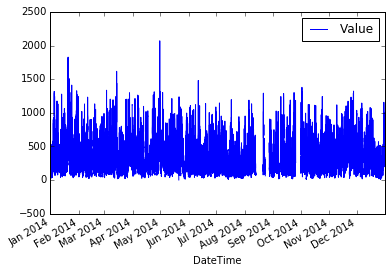

In [26]:
smog_nox = smog.loc[smog.Species == 'NOX']
smog_nox.plot('DateTime','Value')


Now, let's run a few of those tests we used earlier here, to find out the extents of this subset. Answer the following questions:

1. Does the subset contain null values? If so, how many?
2. What is it's temporal range? 
3. How much of the data has been ratified?

**Run these tests in the boxes below.**

In [27]:
# null values?

# this counts the number of non-null values
smog_pm10.count()

Site         35040
Species      35040
DateTime     35040
Value         8552
Units        35040
Ratified?    35040
dtype: int64

In [28]:
# temporal range?
smog_pm10.DateTime.describe()

count                   35040
unique                  35040
top       2014-12-13 22:45:00
freq                        1
first     2014-01-01 00:00:00
last      2014-12-31 23:45:00
Name: DateTime, dtype: object

In [29]:
# data ratified?
smog_pm10['Ratified?'].value_counts()

True     26208
False     8832
Name: Ratified?, dtype: int64

Now we know a little about the NOX subset, we would like to know whether the other subsets of the data are of similar data quality.  

**Rerun the tests above for each of the five Species categories**. The seven boxes below have been provided for you to carry this out, but feel free to add more by going to the Insert menu and selecting Insert Cell Below (or click on the round down arrow button in the toolbar).

In [30]:
# Available species are
smog.Species.value_counts()

NOX      35040
PM2.5    35040
NO       35040
NO2      35040
PM10     35040
Name: Species, dtype: int64

In [31]:
# create subset
smog_no2 = smog.loc[smog.Species == 'NO2']

In [32]:
# check the contents
smog_no2.head()

,Site,Species,DateTime,Value,Units,Ratified?
35040,CD9,NO2,2014-01-01 00:00:00,50.3,ug m-3,True
35041,CD9,NO2,2014-01-01 00:15:00,62.2,ug m-3,True
35042,CD9,NO2,2014-01-01 00:30:00,60.3,ug m-3,True
35043,CD9,NO2,2014-01-01 00:45:00,77.6,ug m-3,True
35044,CD9,NO2,2014-01-01 01:00:00,66.3,ug m-3,True


In [33]:
# check the statistics
smog_no2.describe()

,Value,Ratified?
count,31138.000000,35040
mean,99.008517,0.243836
std,46.924506,0.429401
min,-1.800000,False
25%,64.125000,0
50%,93.100000,0
75%,127.400000,0
max,787.200010,True


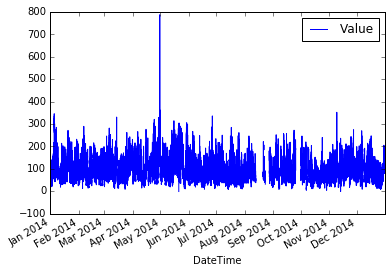

In [34]:
# plot data
smog_no2.plot('DateTime','Value')

In [35]:
# null values?
smog_no2.count()

Site         35040
Species      35040
DateTime     35040
Value        31138
Units        35040
Ratified?    35040
dtype: int64

In [36]:
# temporal range?
smog_no2.DateTime.describe()

count                   35040
unique                  35040
top       2014-12-13 22:45:00
freq                        1
first     2014-01-01 00:00:00
last      2014-12-31 23:45:00
Name: DateTime, dtype: object

In [37]:
# data ratified?
smog_no2['Ratified?'].value_counts()

False    26496
True      8544
Name: Ratified?, dtype: int64

Now that have an idea of the variation in values and data quality across each Species category, it's time to decide what to do about the data. **What do you think?**

Well, I'll tell you what I think we should do. The `PM2.5` and `PM10` data is potentially interesting, but the irregular consistency and proportion of null values make it unreliable. While other categories contain some null values, these are not as prevalent and so we handle these later. I'd therefore suggest we remove the `PM2.5` and `PM10` data from our further analyses.

To do this, we'll turn back to the original dataset - `smog` - and work from there. We'll remove all rows where the Species attribute is `PM2.5` or `PM10`. To do this, we create a new dataframe and add only the rows that correspond to this condition. **Run the example below, which creates a dataframe that excludes the `PM2.5` data.**

In [38]:
smog_nopm25 = smog.loc[smog.Species != 'PM2.5']

**Check the contents of the new dataframe, and confirm that the `'PM2.5'` data has been removed.**

In [39]:
smog_nopm25.Species.value_counts()

NO      35040
NO2     35040
NOX     35040
PM10    35040
Name: Species, dtype: int64

Now, the problem is that the new dataset only excludes one of the subsets we want to remove. So we now need to add to the logic statement above to remove rows where the `Species` is `'PM10'`. 

Like SQL, we use `OR` and `AND` specifiers to join these statements - however, in Pandas the syntax is slightly different. Here, `OR` is defined using a bar like this `|` and `AND` is defined using a `&` symbol. We wrap each individual condition within round brackets, and then put the whole statement within square brackets (just like the simple version above). More information on creating these conditions can be found here http://pandas.pydata.org/pandas-docs/stable/cookbook.html#building-criteria

**Now, using this syntax, from the original dataframe exclude all rows where the `Species` is set as `PM2.5` or `PM10`.**

In [40]:
smog_nopm25or10 = smog.loc[(smog.Species != 'PM2.5') & (smog.Species != 'PM10')]

**And, now, of course, recheck the contents...**

In [41]:
smog_nopm25or10.Species.value_counts()

NO     35040
NO2    35040
NOX    35040
Name: Species, dtype: int64

Before we move on - Did you also notice the negative values earlier? There were some in the PM columns, but also some in the NO columns. Do you think these are acceptable? 

Have a look at those negative values again - export the data using the query below. This is the syntax for querying subsets of your data.

In [42]:
smog.loc[smog['Value'] < 0]

,Site,Species,DateTime,Value,Units,Ratified?
48487,CD9,NO2,2014-05-21 01:45:00,-1.8,ug m-3,False
65420,CD9,NO2,2014-11-13 11:00:00,-1.7,ug m-3,False
83527,CD9,NOX,2014-05-21 01:45:00,-0.3,ug m-3 as NO2,False
132920,CD9,PM10,2014-10-17 14:00:00,-5.2,ug/m3,False
132921,CD9,PM10,2014-10-17 14:15:00,-5.2,ug/m3,False
132922,CD9,PM10,2014-10-17 14:30:00,-5.2,ug/m3,False
132923,CD9,PM10,2014-10-17 14:45:00,-5.2,ug/m3,False
132996,CD9,PM10,2014-10-18 09:00:00,-8.4,ug/m3,False
132997,CD9,PM10,2014-10-18 09:15:00,-8.4,ug/m3,False
132998,CD9,PM10,2014-10-18 09:30:00,-8.4,ug/m3,False


They don't seem to really make sense, so we need to get rid of them.  We do this by just assigning this subset of the data a mull value (known as `NaN` in Python). The `NaN` object is found in the `numpy` library so we have to import that first before we make the change. 

**NOTE**: We could use the method above to extract the subset of data for assigning to null. However, Python complains when you do this, and produces a `SettingWithCopyWarning`. Instead we use the `.loc()` function to do this, which similarly extracts a subset of the data based on a condition.

**Once you've run the script below, check again to see that the previously negative values have been changed to null values.**

In [43]:
# import the numpy library so we can use it's null object
import numpy as np

# replaces the Value data with NaN where they are less than 0
smog.loc[smog.Value < 0] = np.nan
smog.count()
smog.head()

,Site,Species,DateTime,Value,Units,Ratified?
0,CD9,NO,2014-01-01 00:00:00,63.0,ug m-3,1
1,CD9,NO,2014-01-01 00:15:00,64.3,ug m-3,1
2,CD9,NO,2014-01-01 00:30:00,57.6,ug m-3,1
3,CD9,NO,2014-01-01 00:45:00,87.8,ug m-3,1
4,CD9,NO,2014-01-01 01:00:00,55.3,ug m-3,1


## Data Transformation

Following our efforts above we are left with a dataset that includes only relatively clean (and so, hopefully, useful) data. We now want to think about how we get this data into a database for future use.

What we need to consider now is whether the data is organised in the most useful way. Is the current arrangement of columns and rows the most convenient considering that the values vary depending on the `Species`? Are there any columns that repeat across the dataset (resulting in duplication)? **Can you think of another way to arrange the data?**

What I would suggest is that we convert the data so that the `Species` become the column headers, and each row contains the date, time and a value for each column. The `Units` data can be removed as these values vary directly with `Species` (although we should note them for when we are working with the data). The `Ratified?` dataset, however, would seem important and so we will include with within our transformed dataset. We are essentially *unstacking* the data, from the rather unhelpful format it arrived in.

To reshape the dataframe in the ways described above, we use the `.pivot()` function. This function takes an `index` name (to change on each row), a `columns` name for column groups, and a `values` name to indicate variation across these axes. 

**The syntax to create a pivot table between `DateTime` and `Species` is shown below, run it and then check the contents to see how the table has been transformed.**

In [44]:
smog = smog.loc[smog.DateTime.notnull()]
smog_pivot = smog.pivot(index='DateTime', columns='Species', values='Value')

In [45]:
# now check the contents of the new table
smog_pivot.head()

Species,NO,NO2,NOX,PM10,PM2.5
DateTime,,,,,
2014-01-01 00:00:00,63.0,50.3,147.00000,NaN,NaN
2014-01-01 00:15:00,64.3,62.2,160.80000,NaN,NaN
2014-01-01 00:30:00,57.6,60.3,148.60001,NaN,NaN
2014-01-01 00:45:00,87.8,77.6,212.30000,NaN,NaN
2014-01-01 01:00:00,55.3,66.3,151.10001,NaN,NaN


The process of creating a pivot table removes all other rows, so we need to do the same for the `Ratified?` data, recording how the ratification of the data changes over date and time. 

**Run another pivot function below to create a table that shows whether a recording (`NO`, `NO2`, or `NOX`) has been ratified or not, then check the contents.** 

More information on pivot tables can be found here if needed -> http://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [46]:
# create the pivot table
smog_rat = smog.pivot(index='DateTime', columns='Species', values='Ratified?')

In [47]:
# check the contents
smog_rat.head()

Species,NO,NO2,NOX,PM10,PM2.5
DateTime,,,,,
2014-01-01 00:00:00,1,1,1,1,1
2014-01-01 00:15:00,1,1,1,1,1
2014-01-01 00:30:00,1,1,1,1,1
2014-01-01 00:45:00,1,1,1,1,1
2014-01-01 01:00:00,1,1,1,1,1


By now you should have two pivot tables - one show variation in values, the other showing variation in ratification status. We can choose to either keep these tables separate, or join them together, depending on how we want to store them on the database.

In this case, given that they share the same date and time range, we will join them back together *side-by-side*. To perform this function, we use the `.join()` tool, which in fact works in a very similar way to the SQL `JOIN` function. 

To use this, we simply run the function against an existing table, naming the joined table in the function parameters. We can specify further information too - such as the suffixes to use for matching column names, the type of join (e.g. inner, outer, left, right), and which column to use for the join. As we specified the indexes on these tables during the pivot table creation stage, we do not need to make this final specification.

**Look at the specification of the function below and try running it.**

More information on the construction of dataframe joins (and merges, which are similar) can be found here http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

In [48]:
# the lsuffix and rsuffix parameters specify how we handle the matching column names
smog_join = smog_pivot.join(smog_rat, lsuffix='_val', rsuffix='_ratified')

In [49]:
# and now check the results
smog_join.head()

Species,NO_val,NO2_val,NOX_val,PM10_val,PM2.5_val,NO_ratified,NO2_ratified,NOX_ratified,PM10_ratified,PM2.5_ratified
DateTime,,,,,,,,,,
2014-01-01 00:00:00,63.0,50.3,147.00000,NaN,NaN,1,1,1,1,1
2014-01-01 00:15:00,64.3,62.2,160.80000,NaN,NaN,1,1,1,1,1
2014-01-01 00:30:00,57.6,60.3,148.60001,NaN,NaN,1,1,1,1,1
2014-01-01 00:45:00,87.8,77.6,212.30000,NaN,NaN,1,1,1,1,1
2014-01-01 01:00:00,55.3,66.3,151.10001,NaN,NaN,1,1,1,1,1


We're now almost there - hurrah! 

One final thing to consider - with all of these nulls dotted around the data, could we achieve a better coverage by aggregating to a less granular temporal scale? How about just using hourly data, rather than every 15 minutes? 

Well we can do this by running the `.resample()` function on the dataframe. This function summarises the data to the specified temporal range, and aggregates based on a given method. For our case, we'll just calculate hourly averages. 

**Run the code below, taking note of its arrangement.**

In [50]:
# the '60T' section defines the sampling range (T = minutes), 'mean' defines the aggregation method.
smog_resamp = smog_join.resample('60T', 'mean')

**Now one more time. Create a new dataframe that resamples for every day, recording the maximum value for each time period.** 

**HINT**: For this stage, you'll need to work out how to specify the resample rate, using the list found here http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases and identify the correct sampling method from the documentation here http://pandas.pydata.org/pandas-docs/dev/timeseries.html#up-and-downsampling

In [51]:
smog_resamp_day = smog_join.resample('1D', 'max')
smog_resamp_day.head()

Species,NO_val,NO2_val,NOX_val,PM10_val,PM2.5_val,NO_ratified,NO2_ratified,NOX_ratified,PM10_ratified,PM2.5_ratified
DateTime,,,,,,,,,,
2014-01-01,133.20000,114.1,316.10001,NaN,NaN,1,1,1,1,1
2014-01-02,250.39999,139.3,523.29999,NaN,NaN,1,1,1,1,1
2014-01-03,291.89999,157.2,575.90002,NaN,NaN,1,1,1,1,1
2014-01-04,476.39999,215.8,928.90002,NaN,NaN,0,0,0,1,1
2014-01-05,644.79999,345.5,1317.00000,NaN,NaN,0,0,0,1,1


## Database Import

We've finally reached a point where we can feel happy with the quality and format our data is in. It's now time to export that data to a database for future use.

We'll use the Pandas SQL functionality to achieve this. Other more comprehensive SQL packages are available, but the Pandas tools make working between dataframes and SQL quite simple.

### Installing Database Drivers

When accessing a database through an external script or application, you'll always need to ensure two things are done:

1. Make sure the *database drivers* are installed that allow your application (e.g. Python) to talk to your database (e.g. MySQL).

2. Write a *connection string* within your application that tells it where the database is and how to connect to it. The syntax for this varies but the connection string always contains details of the database type, it's location, and the access credentials (e.g. username and password) needed for connection.

We must first deal with the annoying issue of drivers. As you are unlikely to have installed the MySQL to Python connection drivers previously, this is something we must attend to. This involves registering an Academic account with Enthought (providers of this software), and then installation of the drivers through Canopy. It's annoying and a faff, but at least you only have to do this once. 

Follow these steps to install the MySQL-Python drivers. **If you already have an Enthought Academic licence (well done you) then log in and skip through to Step 6.**

1. Create a new Academic registration with Enthought here, **using your UCL email address** -> https://store.enthought.com/accounts/login/ 

2. Await an email from Enthought welcoming you to verify your account, do that.

3. Now wait for another email from Enthought that says 'Thank you for activating your account'. Within this email an option is provided to go to the 'academic license request page', click this link and make the request.

4. A third email will arrive telling you that you've been given an academic licence - hurrah - we're half way there!

5. Restart Canopy. When it opens again, click 'Log in' and provide it with your Enthought account details.

6. In the Canopy main window, go to Package Manager. This is where we manage driver installations, and is a handy place to know.

7. Search for 'mysql', and track down **'MySQL_python 1.2.3-2'**.

8. Click on this package and hit install. Leave it to install (shouldn't take long), and then reopen this file. We're now good to go, and you should never have to go through this ordeal again.


### Making the Database Connection

The Pandas SQL connection builds on the SQLAlchemy library. To create the connection, we first load the SQLAlchemy library, and then create the connection. **The scripts for this are provided below, replace the access credentials where necessary, then run them.** You'll notice that the database location details (host and port numbers) have been provided for you.

The connection settings provided here are for the MySQL database, but different settings are required for other database environments. More information on how to create these connections are provided here: http://docs.sqlalchemy.org/en/rel_0_9/core/engines.html

In [53]:
import mysql.connector
mysql.connector.connect(user='YOURUSERNAME', password='YOURPW',
                              host='IP',
                              database='YOURUSERNAME')

In [54]:
# import the SQLAlchemy libraries
from sqlalchemy import create_engine

# create the connection string to the MySQL database
# replace USERNAME and PASSWORD with your own credentials 
engine = create_engine('mysql+mysqlconnector://YOURUSERNAME:YOURPW@IP/YOURUSERNAME')

# make the connection to the database
conn = engine.raw_connection()

### Accessing the Database from Python

Once we've created the connection to the database, we can write data directly to the database. This uses the `.to_sql()` function on the cleaned dataframe we wish to upload. Within this function we provide parameters the specify the database table name and connection details. The function helpfully creates the new 

**Check out the query below, and then run it.** 

In [57]:
# change TABLENAME for the name of your newly created table
# don't worry about the warning if you get it 
smog_resamp = smog_resamp.rename(columns={'PM2.5_val': 'PM25_val', 'PM2.5_ratified': 'PM25_ratified'}) # SQL doesnt take columne names with period
smog_resamp.head()
smog_resamp.to_sql('smog', conn, flavor='mysql')

/Users/VT/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:1003: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  dtype=dtype)


Finally, we will want to check that the data has actually been correctly uploaded to the database. You can do this through MySQL Workbench, but it's good to know how to run SQL queries in from Python too. 

Here we will run a Pandas function that will call an SQL query and then place the results within a new dataframe. The function is called `.read_sql()` and just requires the SQL query, and the connection details. 

**Test this out below, filling the SQL query with a simply query on your new dataset. Once you've downloaded the data, check out the contents.**

In [59]:
# remember to enter your SQL query in below
smog_db_data = pd.read_sql('select NO_val from YOURUSERNAME.smog', conn) # get nitrogen oxide value from db

In [60]:
# check the imported data
print(smog_db_data.head())

       NO_val
0   68.175000
1   74.466667
2   90.433333
3   98.400000
4  116.225000


**Open up MySQL Workbench too and go and find your new dataset.**

More information on how to access databases, insert data and query tables using SQL can be found the in documentation here: http://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries

### Exercises

Well done for completing this tutorial. You should now have a good grounding in how to use Python and Pandas to load and clean data, and upload it to a database. We'll continue to use similar methods in the coming weeks. 

If you want to explore these methods further in the meantime, here are a few additional activities you might want to try:

* Download a new dataset from London Air (http://www.londonair.org.uk/), go through the same process to fix up the data. Does the current table structure suit inclusion of data from multiple sites?

* If you don't want to work with a new air pollution dataset, use the SQL connection to download only the *ratified* data. Explore how the NO, NO2 and NOX readings vary together over time, using plots and any other methods you feel like trying out (covariance and correlation, perhaps?).

* Go and find another dataset to play with at the UK Open Datastore (http://data.gov.uk/data/search). There are some truly terrible, messy examples on there to get your teeth stuck into. 

